# LetsGrowMore Virtual Internship Program 2021

# Task- 2 Prediction Using Decision Tree Algorithm.

#### Create a Decision Tree Classifier and Visualize it Graphically.

In [48]:
#importing requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score 

In [49]:
#loading the dataset
Data = pd.read_csv("Iris.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


In [50]:
Data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
Data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [52]:
#shape of data
Data.shape

(150, 5)

In [53]:
Data.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [54]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
Data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###  visualization

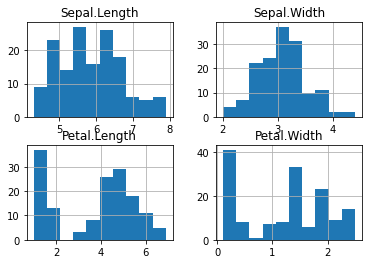

In [56]:
#histogram of each feature
Data.hist()
plt.show()

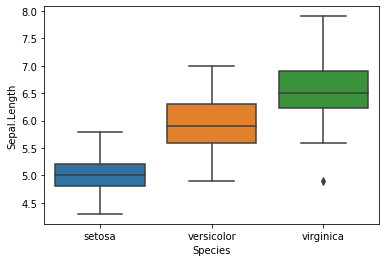

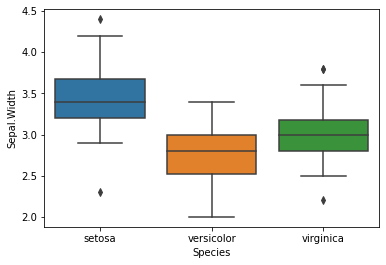

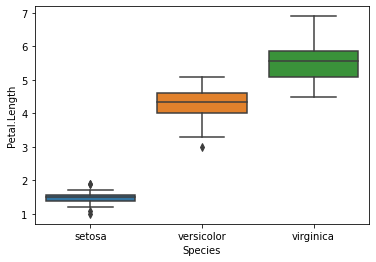

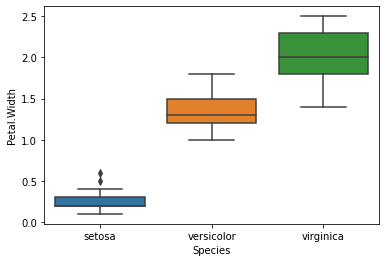

In [57]:
#boxplot between feature and species.
for col in Data.columns:
    if Data[col].dtypes != "object":
        sns.boxplot(Data['Species'],Data[col])     
        plt.show()

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000


<AxesSubplot:>

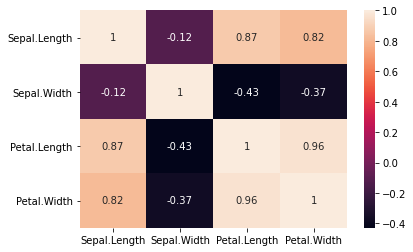

In [58]:
#correlation function
print(Data.corr())
sns.heatmap(Data.corr(), annot = True)

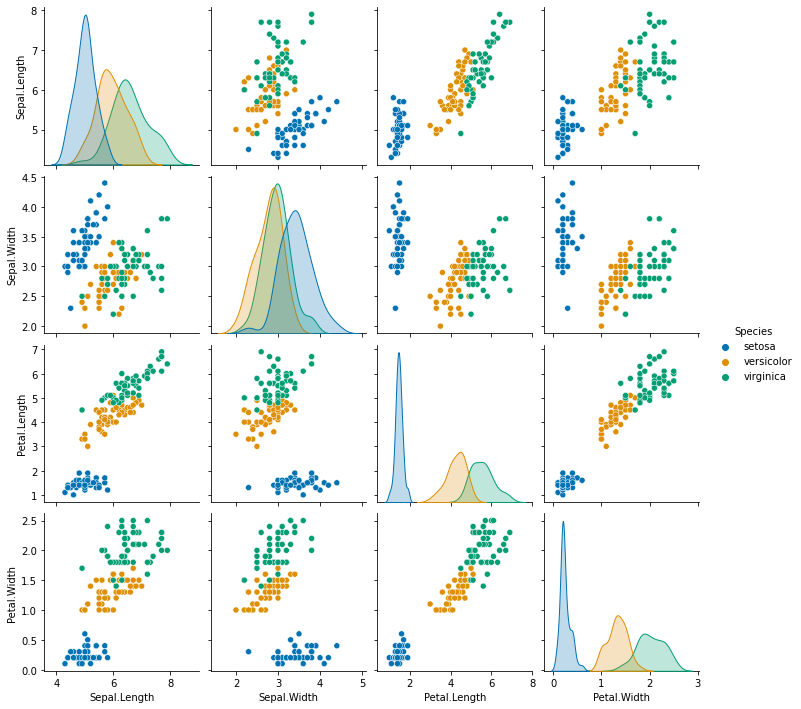

In [59]:
#pairplot
sns.pairplot(data=Data,hue="Species",palette="colorblind")

###  Data Prepration and spliting the Dataset

In [60]:
X = Data.drop('Species', axis = 1)
Y = Data['Species']

In [61]:
#test-train-split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [62]:
#train the model.
dtc = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

In [63]:
confusion_matrix(y_test,y_predict)

array([[13,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  8]], dtype=int64)

In [64]:
(9+10+9)/(9+0+0+0+10+2+0+0+9)

0.9333333333333333

In [65]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

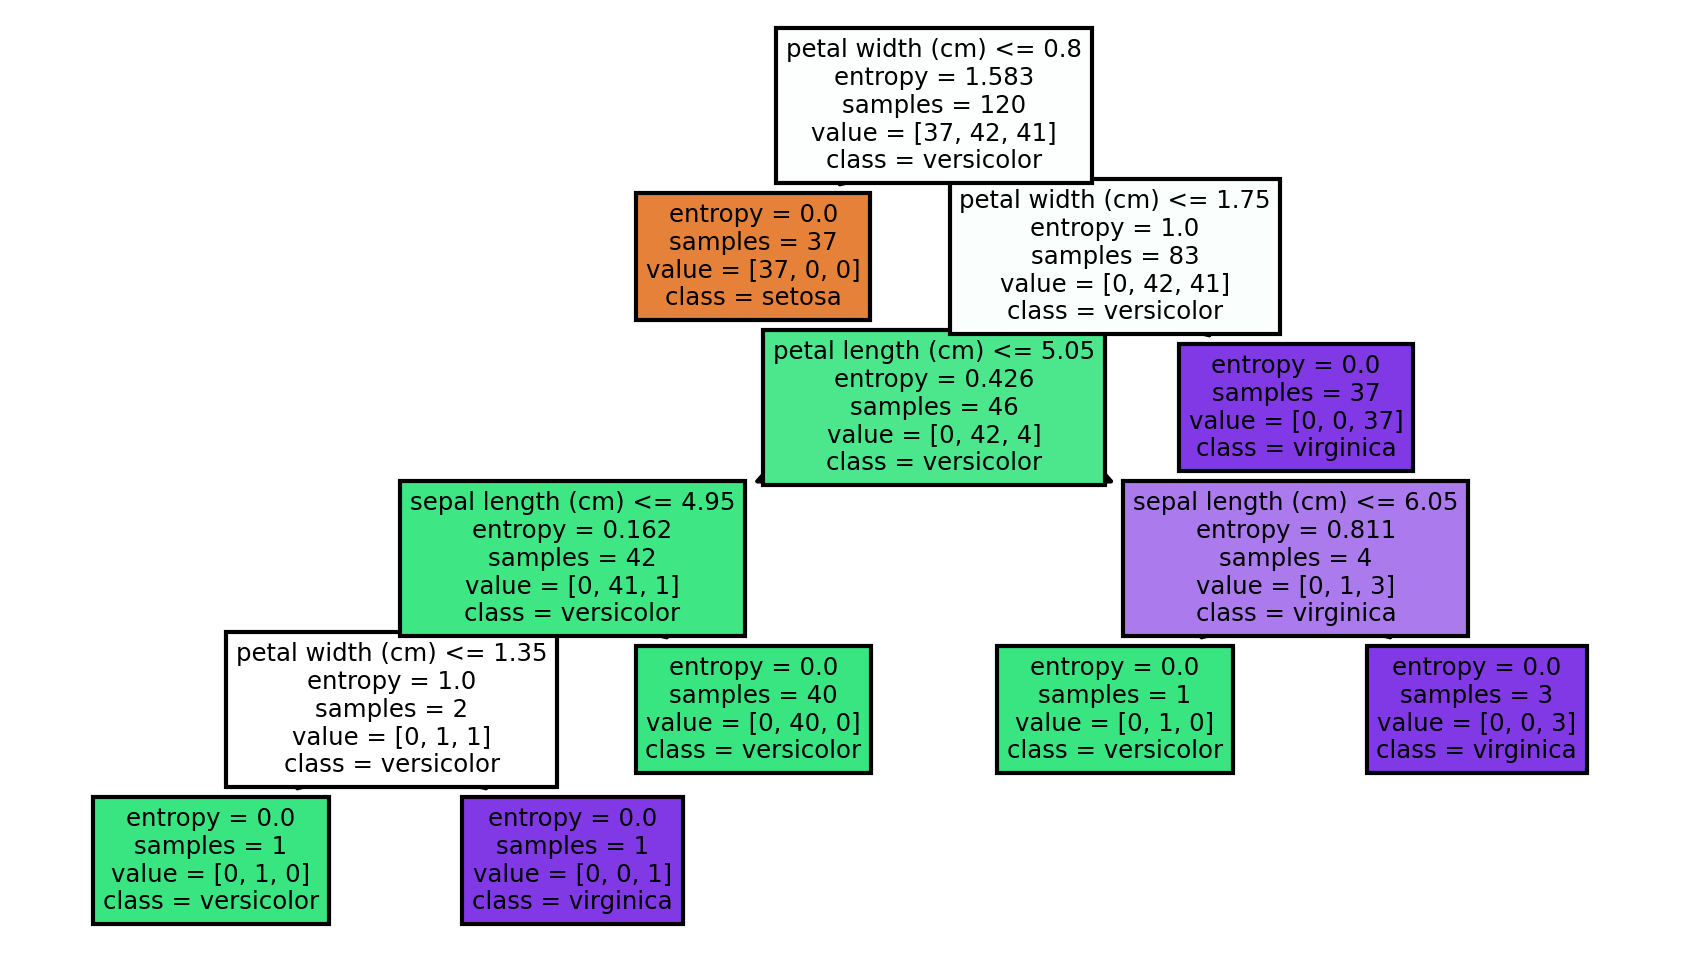

In [66]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 300)

tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);

####  model evaluation

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.88      0.88      0.88         8
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



<AxesSubplot:>

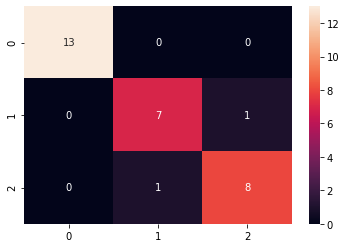

In [67]:
print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot = True)

In [68]:
accuracy_score(y_test, y_predict)

0.9333333333333333

#####  we get nearly 93% accuracy.

# Thank you